In [2]:
import json
from pathlib import Path
from matplotlib import pyplot as plt
import networkx as nx

plt.rcParams["figure.dpi"] = plt.rcParamsDefault["figure.dpi"]
plt.rcParams["figure.figsize"] = (3,3)
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

weight_labels = {
    0: 'Brute',
    0.5: 'AStar',
    1.0: 'Dijkstra',
    1: 'Dijkstra',
}

colors = {
    0: 'blue',
    0.5: 'red',
    1.0: 'green',
    1: 'green',
}

In [3]:
file = open("evaluation/results/pixels-AStar0.5-60s.json", mode="r")
data = json.load(file)
file.close()
for i, c in enumerate(data['cases']):
    if 'graph' in data['cases'][i]:
        data['cases'][i].pop('graph')
with open("evaluation/results/pixels-AStar0.5-60s_nograph.json", mode="w") as file:
    json.dump(data, file)

In [159]:
# path = Path("evaluation/results/pixels-AStar0.2-60s.json")
# file = open(path, mode="r")
# data = json.load(file)
weight_fname = {
    0: "evaluation/results/strings_1-40_trial1-AStar0-60s.json",
    # 0.3: "evaluation/results/strings_1-40_trial1-AStar0.3-60s.json",
    0.5: "evaluation/results/strings_1-40_trial1_postfix-AStar0.5-60s.json",
    # 0.8: "evaluation/results/strings_1-40_trial1-AStar0.8-60s.json",
    1.0: "evaluation/results/strings_1-40_trial1_postfix-AStar1-60s.json",
    "0.5mod": "evaluation/results/strings_1-40_trial1_alignment-AStar0.5-60s.json",
    "0.5mod2": "evaluation/results/strings_1-40_trial1_alignment_c1-AStar0.5-60s.json",
}
weight_data = {}
for w, fname in weight_fname.items():
    file = open(fname, mode="r")
    data = json.load(file)
    # for i, tc in enumerate(data['cases']):
    #     data['cases'][i].pop('graph')
    weight_data[w] = data
    file.close()

In [160]:
weight_size_cases = {}
for weight, data in weight_data.items():
    size_cases = {}
    for case in data['cases']:
        size = int(case['name'].split('-')[0])
        if size not in size_cases:
            size_cases[size] = list()
        size_cases[size].append(case)
    weight_size_cases[weight] = size_cases

[100.0, 0.0, 0.0, 0.0, 0.0, 100.0, 100.0, 28.571428571428573, 0.0, 0.0, 100.0, 100.0, 28.571428571428573, 0.0, 0.0, 0.0, 100.0, 0.0, 42.857142857142854, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 57.142857142857146, 0.0, 0.0, 85.71428571428571, 0.0, 57.142857142857146, 100.0, 100.0, 100.0, 0.0, 100.0, 0.0]
[100.0, 100.0, 100.0, 0.0, 71.42857142857143, 100.0, 71.42857142857143, 14.285714285714286, 0.0, 42.857142857142854, 100.0, 100.0, 0.0, 28.571428571428573, 0.0, 0.0, 0.0, 0.0, 57.142857142857146, 0.0, 0.0, 85.71428571428571, 100.0, 0.0, 0.0, 100.0, 42.857142857142854, 57.142857142857146, 100.0, 100.0, 100.0, 0.0, 57.142857142857146, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[100.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 85.71428571428571, 100.0, 0.0, 0.0, 0.0, 0.0, 57.142857142857146, 100.0, 0.0, 0.0, 0.0, 0.0, 100.0, 100.0, 100.0, 0.0, 0.0, 0.0]
[100.0, 100.0, 100.0, 0.0, 71.42857142857143, 100.0, 71.42857142857143, 1

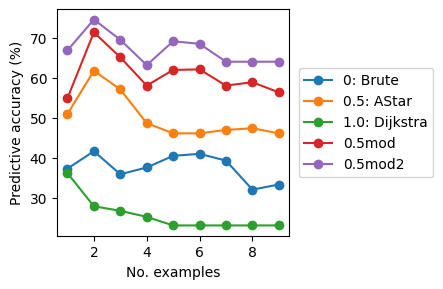

In [161]:
predictive_accuracy_plot_data = {}
for weight, size_cases in weight_size_cases.items():
    cases = size_cases[3]
    print([float(c['success_percentage']) for c in cases])
    size_predictive_accuracy = {size: sum([float(c['success_percentage']) for c in cases])/len(cases) for size, cases in size_cases.items() }
    weight_label = str(weight)
    if weight in weight_labels:
        weight_label += f": {weight_labels.get(weight, '')}"
    plt.plot(size_predictive_accuracy.keys(), size_predictive_accuracy.values(), "o-", label=weight_label)
    predictive_accuracy_plot_data[weight] = (size_predictive_accuracy.keys(), size_predictive_accuracy.values(), weight_label)

plt.xlabel("No. examples")
plt.ylabel("Predictive accuracy (%)")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
# axes = plt.gca()
# axes.set_aspect(0.15)
plt.savefig('strings_predictive_accuracy.svg', bbox_inches="tight")
plt.show()

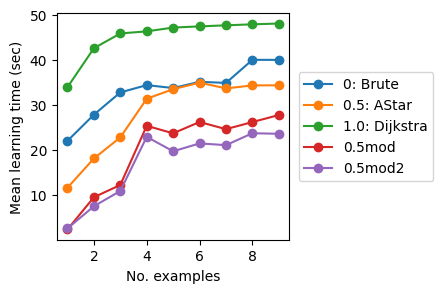

In [162]:
from numpy import NaN

execution_time_plot_data = {}
for weight, size_cases in weight_size_cases.items():
    size_time = {}
    size_iterations = {}
    for size, cases in size_cases.items():
        # solved_cases = [c for c in cases if c['solution_found']]
        # if len(solved_cases) == 0:
        #     mean_iterations = NaN
        #     mean_time = NaN
        # else:
        mean_iterations = sum([c['iteration_count'] for c in cases])/len(cases)
        mean_time = sum([c['execution_time'] for c in cases])/len(cases)
        size_iterations[size] = mean_iterations
        size_time[size] = mean_time

    weight_label = str(weight)
    if weight in weight_labels:
        weight_label += f": {weight_labels.get(weight, '')}"
    plt.plot(size_time.keys(), size_time.values(), "-o", label=weight_label)
    execution_time_plot_data[weight] = (size_time.keys(), size_time.values(), weight_label)

plt.xlabel("No. examples")
plt.ylabel("Mean learning time (sec)")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
# axes = plt.gca()
# axes.set_aspect(0.4)
plt.savefig("strings_execution_time.svg", bbox_inches="tight")
plt.show()


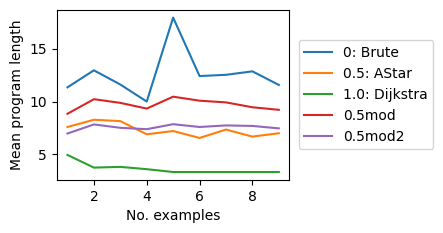

In [163]:
program_length_plot_data = {}
for weight, size_cases in weight_size_cases.items():
    size_program_length = {}
    for size, cases in size_cases.items():
        solved_cases = [c for c in cases if c['solution_found']]
        mean_program_length = sum([c['best_program_length'] for c in solved_cases])/len(solved_cases)
        size_program_length[size] = mean_program_length

    weight_label = str(weight)
    if weight in weight_labels:
        weight_label += f": {weight_labels.get(weight, '')}"
    plt.plot(size_program_length.keys(), size_program_length.values(), label=weight_label)
    program_length_plot_data[weight] = (size_program_length.keys(), size_program_length.values(), weight_label)

plt.xlabel("No. examples")
plt.ylabel("Mean program length")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
axes = plt.gca()
axes.set_aspect(0.4)
plt.savefig("strings_program_length.svg", bbox_inches="tight")
plt.show()

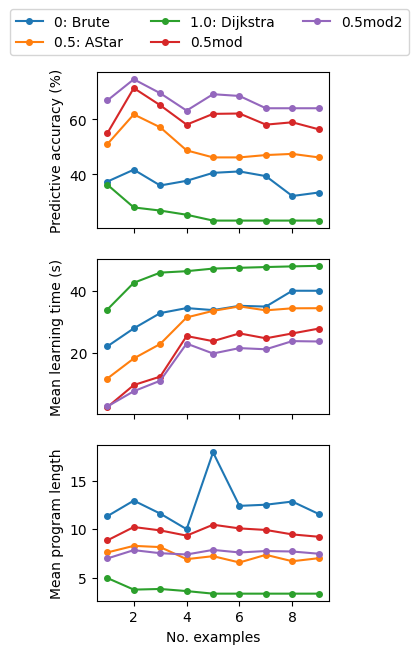

In [164]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(3,7))
ax1.set(ylabel="Predictive accuracy (%)")
for weight, (x, y, lbl) in predictive_accuracy_plot_data.items():
    ax1.plot(x, y, 'o-', markersize=4, label=lbl)
ax2.set(ylabel="Mean learning time (s)")
for weight, (x, y, lbl) in execution_time_plot_data.items():
    ax2.plot(x, y, 'o-', markersize=4, label=lbl)
ax3.set(ylabel="Mean program length")
for weight, (x, y, lbl) in program_length_plot_data.items():
    ax3.plot(x, y, 'o-', markersize=4, label=lbl)

ax3.set(xlabel="No. examples")
handles, labels = ax3.get_legend_handles_labels()
# fig.legend(handles, labels, bbox_to_anchor=(1.04,0.5), loc='center left', borderaxespad=0)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.97), borderaxespad=0, ncol=3)

plt.savefig("strings_combined.svg", bbox_inches="tight")
plt.show()

{0: 37.63691041468818, 0.5: 50.180323791434894, 1.0: 25.71168543390765, '0.5mod': 60.83514222403111, '0.5mod2': 67.17824356713247}
{0: 33.41542022792024, 0.5: 28.296563390313388, 1.0: 45.200186965811966, '0.5mod': 19.776664886039885, '0.5mod2': 17.05702457264957}


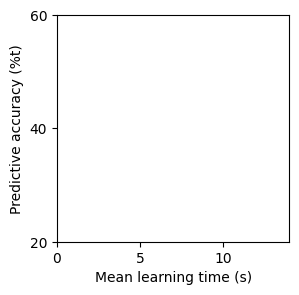

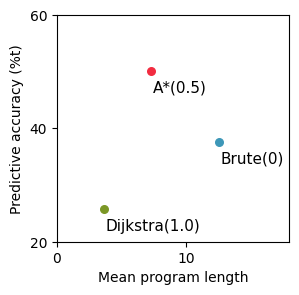

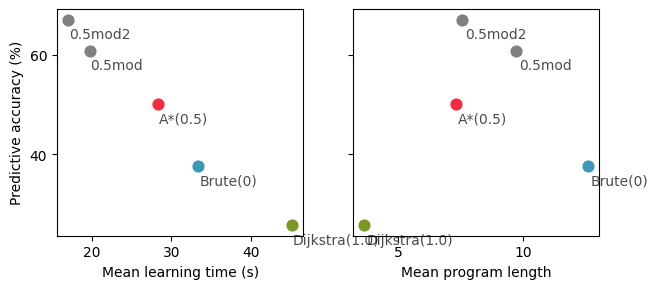

In [165]:
weight_mean_accuracy = {}
weight_mean_learning_time = {}
weight_mean_program_length = {}

for w in weight_size_cases.keys():
    accuracies = predictive_accuracy_plot_data[w][1]
    mean_accuracy = sum(accuracies)/len(accuracies)
    weight_mean_accuracy[w] = mean_accuracy

    learning_times = execution_time_plot_data[w][1]
    mean_learning_time = sum(learning_times)/len(learning_times)
    weight_mean_learning_time[w] = mean_learning_time

    program_lengths = program_length_plot_data[w][1]
    mean_program_length = sum(program_lengths)/len(program_lengths)
    weight_mean_program_length[w] = mean_program_length

print(weight_mean_accuracy)
print(weight_mean_learning_time)

#3d97b8 blue
#f22c40 red
#7b9726 green

colors = {
    0: '#3d97b8',
    0.5: '#f22c40',
    1.0: '#7b9726'
}

labels = {
    0: 'Brute(0)',
    0.5: 'A*(0.5)',
    1.0: 'Dijkstra(1.0)'
}

for w in weight_size_cases.keys():
    plt.scatter(weight_mean_learning_time[w], weight_mean_accuracy[w], c=colors.get(w, 'grey'), s=30)
    plt.annotate(labels.get(w, str(w)), (weight_mean_learning_time[w], weight_mean_accuracy[w]), (weight_mean_learning_time[w]+0.1, weight_mean_accuracy[w]-3.7), fontsize=(11 if w in labels else 10))

plt.xlim([0,14])
plt.ylim([20,60])
plt.xlabel("Mean learning time (s)")
plt.ylabel("Predictive accuracy (%t)")
plt.locator_params(nbins=3)
plt.show()

for w in weight_size_cases.keys():
    plt.scatter(weight_mean_program_length[w], weight_mean_accuracy[w], c=colors.get(w, 'grey'), s=30)
    plt.annotate(labels.get(w, str(w)), (weight_mean_program_length[w], weight_mean_accuracy[w]), (weight_mean_program_length[w]+0.1, weight_mean_accuracy[w]-3.7), fontsize=(11 if w in labels else 10))

plt.xlim([0,18])
plt.ylim([20,60])
plt.xlabel("Mean program length")
plt.ylabel("Predictive accuracy (%t)")
plt.locator_params(nbins=3)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(7,3))
for w in weight_size_cases.keys():
    ax1.scatter(weight_mean_learning_time[w], weight_mean_accuracy[w], c=colors.get(w, 'grey'), s=60)
    ax1.annotate(labels.get(w, str(w)), (weight_mean_learning_time[w], weight_mean_accuracy[w]), (weight_mean_learning_time[w]+0.1, weight_mean_accuracy[w]-3.7), fontsize=10, alpha=0.7)
# ax1.set_xlim([0,14])
# ax1.set_ylim([20,60])
ax1.set_xlabel("Mean learning time (s)")
ax1.set_ylabel("Predictive accuracy (%)")
for w in weight_size_cases.keys():
    ax2.scatter(weight_mean_program_length[w], weight_mean_accuracy[w], c=colors.get(w, 'grey'), s=60)
    ax2.annotate(labels.get(w, str(w)), (weight_mean_program_length[w], weight_mean_accuracy[w]), (weight_mean_program_length[w]+0.1, weight_mean_accuracy[w]-3.7), fontsize=10, alpha=0.7)
# ax2.set_xlim([0,18])
# ax2.set_ylim([20,60])
ax2.set_xlabel("Mean program length")
plt.locator_params(nbins=3)

plt.savefig("strings_conclusion.svg", bbox_inches="tight", transparent=True)
plt.show()





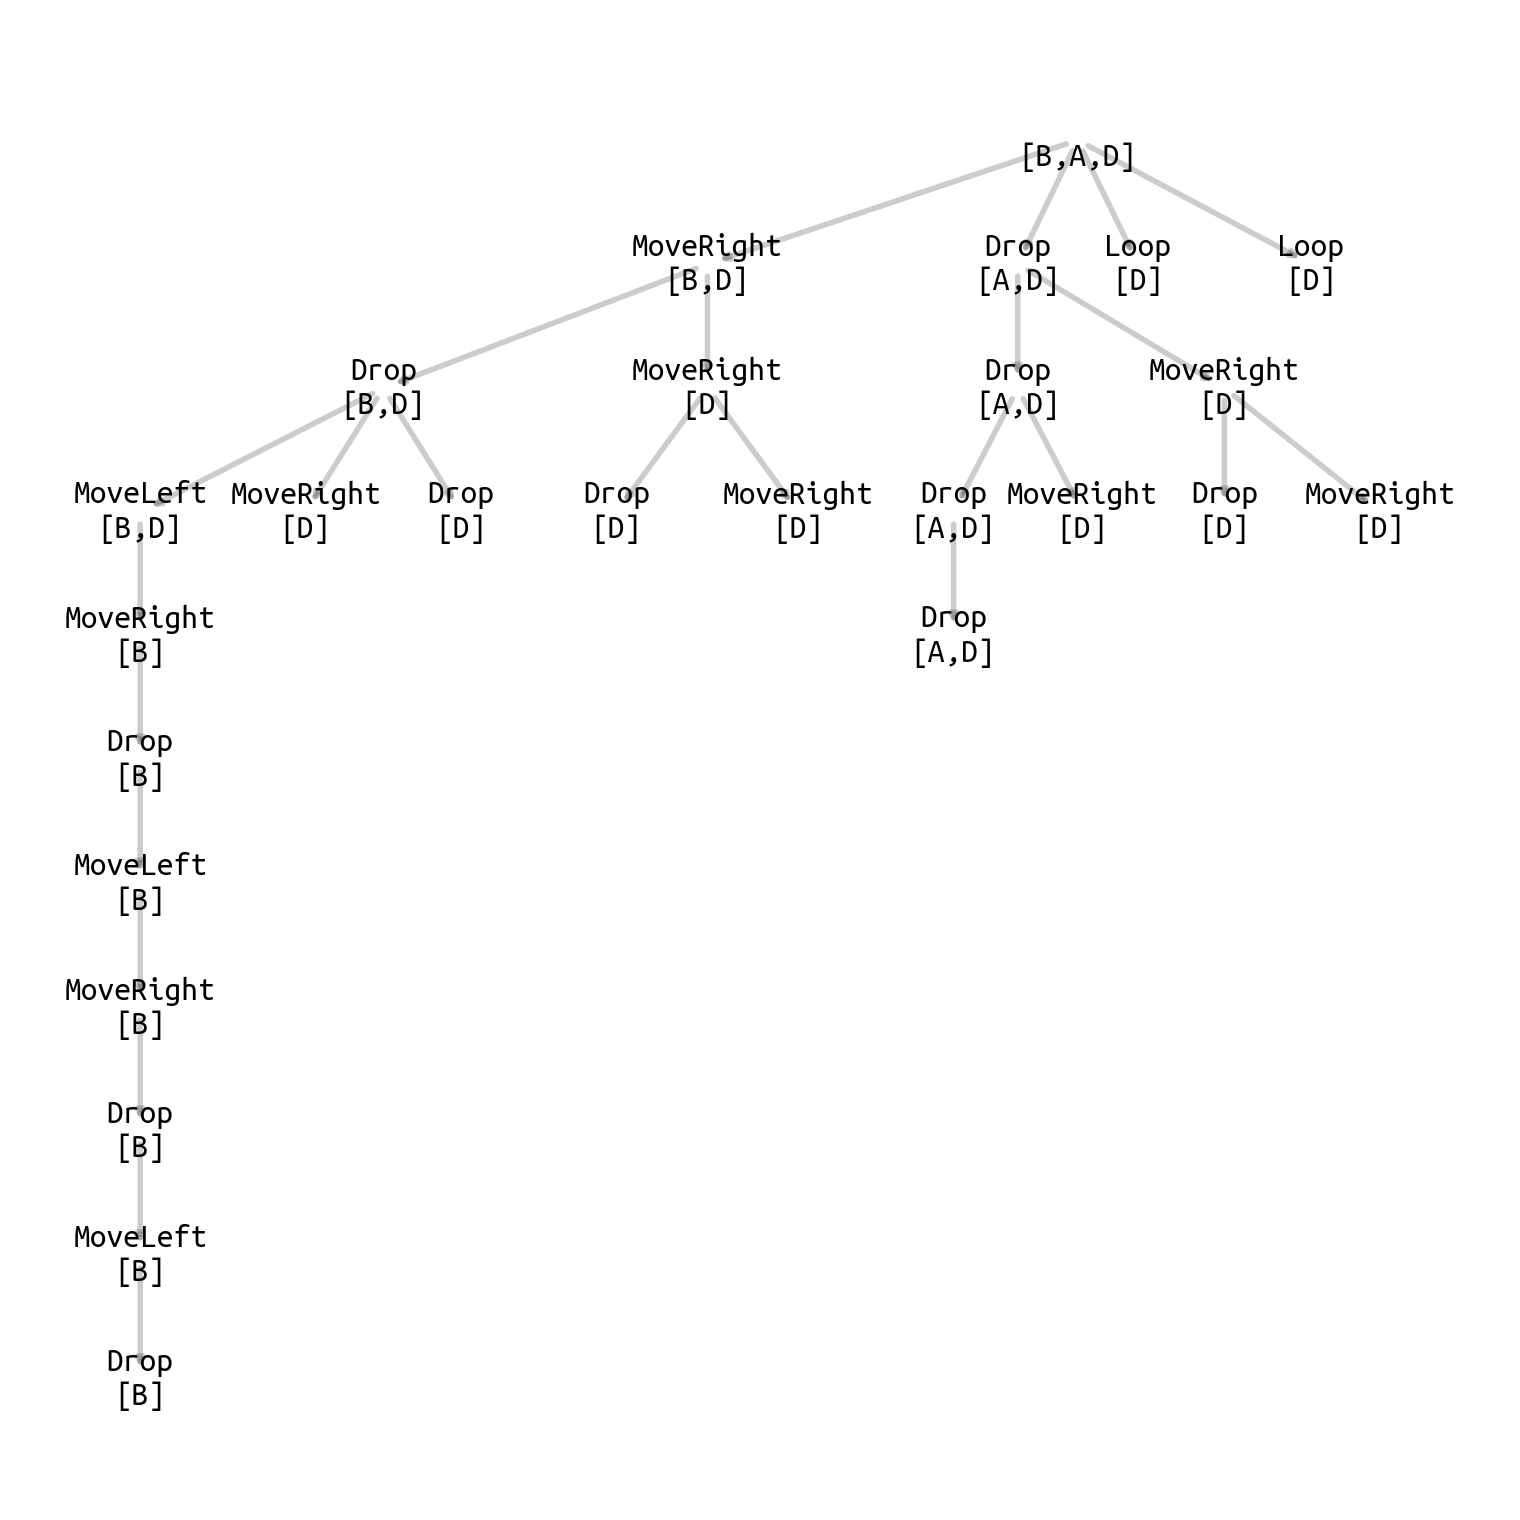

In [179]:
from utilities import PGraph

# case_id = 16
case_id = 16

B_data = weight_size_cases[0][2][case_id]['graph']
B = nx.node_link_graph(B_data)
for node in B.nodes:
    B.nodes[node]['B'] = True

R_data = weight_size_cases[0.5][2][case_id]['graph']
R = nx.node_link_graph(R_data)
for node in R.nodes:
    R.nodes[node]['R'] = True

G_data = weight_size_cases[1][2][case_id]['graph']
G = nx.node_link_graph(G_data)
for node in G.nodes:
    G.nodes[node]['G'] = True

BR = nx.compose(B, R)
H = nx.compose(BR, G)

pos = nx.nx_agraph.graphviz_layout(H, prog="dot", args="")
labels = {node: node[-1] if node else "" for node in H.nodes}
for k, v in labels.items():
    if v.startswith("LoopWhile"):
        labels[k] = "Loop"
# labels = {n: n[-1] for n in H.nodes if 'solution' in H.nodes[n]}
# edge_labels = {edge: H.nodes[edge[1]]['seq'] for edge in H.edges if 'seq' in H.nodes[edge[1]]}
edge_labels = {edge: labels[edge[1]] for edge in H.edges}
for k, v in edge_labels.items():
    if v.startswith("LoopWhile"):
        edge_labels[k] = "LoopWhile"

colormap = list()
for node in H.nodes:
    color = 'brown'
    n = H.nodes[node]
    if {'B', 'R', 'G'} <= n.keys():
        color = 'brown'
    elif {'B', 'R'} <= n.keys():
        color = 'magenta'
    elif {'B', 'G'} <= n.keys():
        color = 'cyan'
    elif {'R', 'G'} <= n.keys():
        color = 'yellow'
    colormap.append(color)

color_labels = {}
for node in H.nodes:
    chars = []
    n = H.nodes[node]
    if 'B' in n:
        chars.append('B')
    if 'R' in n:
        chars.append('A')
    if 'G' in n:
        chars.append('D')
    color_labels[node] = labels[node] + "\n" + "[" + ",".join(chars) + "]"


sizemap = [5 if 'solution' not in H.nodes[n] else 30 for n in H.nodes ]

import random
rand_label_pos = [random.uniform(0.1, 0.5) for _ in H.edges]

# nx.draw_networkx_edges(H, pos, alpha=0.2)
plt.figure(figsize=(15,15))
ax = plt.axes([0,0,1,1], frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.autoscale(tight=True)
# nx.draw_networkx_labels(H, pos, labels, font_size=15, font_family="Ubuntu Mono")
nx.draw_networkx_edges(H, pos, alpha=0.2, width=4)
nx.draw_networkx_labels(H, pos, color_labels, font_size=24, font_family="Ubuntu Mono")
# nx.draw_networkx_nodes(H, pos, node_size=sizemap, node_color=colormap)
# nx.draw_networkx_edge_labels(H, pos, edge_labels, font_size=13, font_family="Ubuntu Mono", rotate=False, label_pos=0.3)
# nx.draw_networkx_edge_labels(H, pos, edge_labels, font_size=8, font_family="Ubuntu Mono", rotate=False)

plt.savefig('strings_tree.svg', bbox_inches="tight", transparent=True)
plt.show()



In [157]:
# weight_cases = {weight: list(size_cases.values()) for weight, size_cases in weight_size_cases.items()}
weight_cases = {}
for weight, size_cases in weight_size_cases.items():
    weight_cases[weight] = []
    for size, cases in size_cases.items():
        weight_cases[weight] += cases

dijkstra_cases = weight_cases[1]
astar_cases = weight_cases[0.5]
astarmod_cases = weight_cases["0.5mod"]

weight_name_case = {}
for weight, cases in weight_cases.items():
    weight_name_case[weight] = {}
    for case in cases:
        weight_name_case[weight][case['name']] = case

dijkstra_name_case = weight_name_case[1]
astar_name_case = weight_name_case[0.5]
astarmod_name_case = weight_name_case["0.5mod"]

dijkstra_solved_name_case = {k: v for k, v in dijkstra_name_case.items() if v['solution_found']}
astar_solved_name_case = {k: v for k, v in astar_name_case.items() if v['solution_found']}
astarmod_solved_name_case = {k: v for k, v in astarmod_name_case.items() if v['solution_found']}

print(f"dijkstra solved: {len(dijkstra_solved_name_case)}/{len(dijkstra_name_case)}")
print(f"astar solved: {len(astar_solved_name_case)}/{len(astar_name_case)}")
print(f"astarmod solved: {len(astarmod_solved_name_case)}/{len(astarmod_name_case)}")

dijkstra_astar_delta = []

for name, case in dijkstra_solved_name_case.items():
    if name in astar_solved_name_case:
        astar_case = astar_solved_name_case[name]
        dijkstra_len = case['best_program_length']
        astar_len = astar_case['best_program_length']
        dijkstra_astar_delta.append((case, astar_case, astar_len-dijkstra_len))

from common.environment import StringEnvironment

for dijkstra, astar, delta in dijkstra_astar_delta:
    input = dijkstra['training_examples'][0]['input']
    input = StringEnvironment.parse(input).to_string()
    output = dijkstra['training_examples'][0]['output']
    output = StringEnvironment.parse(output).to_string()
    # print(input)
    # print(output)
    # print(dijkstra['program'])
    # print(astar['program'])
    # print(f"delta: {delta}")
    # print()

name_dijkstra_astar = {dijkstra['name']: (dijkstra, astar) for dijkstra, astar, delta in dijkstra_astar_delta if delta != 0}

for name, (dijkstra, astar) in name_dijkstra_astar.items():
    print(name)


dijkstra solved: 98/351
astar solved: 203/351
astarmod solved: 253/351
1-23-1
1-25-1
1-35-1
2-3-1
2-35-1
4-3-1
4-35-1
5-35-1
7-35-1
8-3-1
8-35-1
9-35-1


In [158]:
case_name = "1-35-1"
case = astar_name_case[case_name]
print(case['training_examples'][0]['input'])
print(case['training_examples'][0]['output'])
A = nx.node_link_graph(case['graph'])

for node in A:
    attrs = A.nodes[node]
    if attrs:
        print(node)
        print(A.nodes[node])




StringEnvironment(Pointer at 0 in "Yoshua Bengio")
StringEnvironment(Pointer at 0 in "Y Bengio")
('LoopWhile(IsNotSpace [Drop])',)
{'gcost': 3, 'hcost': 1.0, 'seq': 1}
('LoopWhile(IsNotSpace [Drop])', 'MoveRight')
{'gcost': 4, 'hcost': 1.0, 'seq': 2}
('MoveRight', 'Drop')
{'gcost': 2, 'hcost': 4.0, 'seq': 3}
('MoveRight', 'Drop', 'LoopWhile(IsLowercase [Drop])')
{'solution': True, 'gcost': 5, 'hcost': 0.0, 'seq': 4}


x1 x2 x3 xi-1 xi
y1 y2 y3 yj-1 yj

* xi and yj are matched:    OPT(i, j) = mismatch(xi, yj) + OPT(i-1, j-1)
* xi left unmatched:        OPT(i, j) = inf
* yj left unmatched:        OPT(i, j) = d + OPT(i, j-1)

OPT(i,j) =
inf     if i=0
i*d     if j=0
min(
    OPT(i-1, j-1)                   if xi == yj
    mismatch + OPT(i-1, j-1)        if xi != yj
    2 * mismatch + OPT(i-n, j-n)    if xi-n...xi != yj-n, yj

    d  + OPT(i, j-1)
    2d + OPT(i, j-n)



    2d + OPT(i, j-2)
    2d + OPT(i, j-3)
    2d + OPT(i, j-4)
    ...
    )

In [148]:
def distance(x, y, pos):
    m = len(x)
    n = len(y)

    mem = [float('inf')] * (m+1)
    for i in range(m+1):
        mem[i] = [float('inf')] * (n+1)

    for i in range(m+1):
        mem[i][0] = i*1
    for j in range(1, n+1):
        mem[0][j] = float('inf')
    for j in range(1, n+1):
        for i in range(1, m+1):
            cases = []
            if x[i-1] == y[j-1]:
                cases.append(mem[i-1][j-1])
            elif x[i-1].lower() == y[j-1].lower():
                cases.append(1 + mem[i-1][j-1])
            cases.append(1 + mem[i-1][j])
            cases.append(float('inf'))

            mem[i][j] = min(cases)
    return mem[m][n]


distance("Yoshua Bengio", "Y Bengio")


5